# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/poppinfresch/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("newsapikey")


In [3]:
print(api_key)

2946d378ff184719a54072be36e6e07c


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en", page_size=10)
bitcoin_news


{'status': 'ok',
 'totalResults': 6204,
 'articles': [{'source': {'id': None, 'name': 'Blogspot.com'},
   'author': 'noreply@blogger.com (Unknown)',
   'title': "Elon Musk reveals who bitcoin's creator Satoshi Nakamoto might be",
   'description': 'Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expert Nick Szabo could be Satoshi Nakamoto, the mysterious creator of the digital currency Bitcoin.\xa0"You can watch ideas evolve before Bitcoin was lau…',
   'url': 'https://techncruncher.blogspot.com/2021/12/elon-musk-reveals-who-bitcoins-creator.html',
   'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEik_48hPzMzsDzwfdUeHj4jNGqYGevEuVjTTPkAGTu9bRN3oePxV6bxF897GK8Az3AaSqUOalYXNG4HSCy0fW5KUHuruCWP8hAfZxgrgbzh-dsbLM9jxyFGCthOZdBCa1dNkqk6mrVl0VtflsV2VvKXfGnwL6-68m-mxp7qHJuLlvqGIahZ9YDe5mt97w=w1200-h630-p-k-no-nu',
   'publishedAt': '2021-12-29T20:41:00Z',
   'content': 'Musk.MARK RALSTON/AFP via Getty Images\r\nElon

In [51]:

#transform to DataFrame

# Create the bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head(10)



,date,text,compound,positive,negative,neutral
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.000,0.923
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000
2,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917
3,2022-01-14,Block founder Jack Dorsey has announced on Twi...,-0.4404,0.000,0.083,0.917
4,2022-01-14,Tesla Inc (TSLA.O) will accept the meme-based ...,0.3818,0.073,0.000,0.927
5,2022-01-11,A cryptocurrency CEO has become one of the ric...,0.6369,0.148,0.000,0.852
6,2022-01-14,Jack Dorsey onstage at a bitcoin convention in...,-0.4404,0.000,0.088,0.912
7,2021-12-23,Dec 23 (Reuters) - The U.S. Securities and Exc...,0.5859,0.142,0.000,0.858
8,2022-01-07,Between Bitcoin-themed superspreader events an...,-0.3716,0.000,0.074,0.926
9,2021-12-28,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000


In [52]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en", page_size=10)
ethereum_news

#transform to dataframe


# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()



,date,text,compound,positive,negative,neutral
0,2021-12-30,"Crypto Street Restaurant, Clearwater Beach, Fl...",-0.1531,0.000,0.06,0.940
1,2022-01-11,Investors interest and growing cryptocurrency ...,0.7579,0.217,0.00,0.783
2,2021-12-29,CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...,0.0000,0.000,0.00,1.000
3,2021-12-20,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.00,1.000
4,2022-01-04,"In early December 2021, Skiff rolled out the o...",0.0000,0.000,0.00,1.000


In [53]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,10.000000,10.000000,10.000000,10.000000
mean,0.027300,0.044000,0.032800,0.923200
std,0.439399,0.061433,0.042478,0.048696
min,-0.440400,0.000000,0.000000,0.852000
25%,-0.423200,0.000000,0.000000,0.913250
50%,0.000000,0.000000,0.000000,0.920000
75%,0.376650,0.076000,0.080750,0.926750
max,0.636900,0.148000,0.088000,1.000000


In [54]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,10.000000,10.000000,10.000000,10.00000
mean,0.200370,0.059000,0.006000,0.93500
std,0.362500,0.097073,0.018974,0.09485
min,-0.153100,0.000000,0.000000,0.77500
25%,0.000000,0.000000,0.000000,0.87400
50%,0.000000,0.000000,0.000000,1.00000
75%,0.477675,0.111000,0.000000,1.00000
max,0.762000,0.225000,0.060000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [55]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [56]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = stopwords.words('english')

# Expand the default stopwords list if necessary
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [57]:
bitcoin_df

,date,text,compound,positive,negative,neutral
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.000,0.923
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000
2,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917
3,2022-01-14,Block founder Jack Dorsey has announced on Twi...,-0.4404,0.000,0.083,0.917
4,2022-01-14,Tesla Inc (TSLA.O) will accept the meme-based ...,0.3818,0.073,0.000,0.927
5,2022-01-11,A cryptocurrency CEO has become one of the ric...,0.6369,0.148,0.000,0.852
6,2022-01-14,Jack Dorsey onstage at a bitcoin convention in...,-0.4404,0.000,0.088,0.912
7,2021-12-23,Dec 23 (Reuters) - The U.S. Securities and Exc...,0.5859,0.142,0.000,0.858
8,2022-01-07,Between Bitcoin-themed superspreader events an...,-0.3716,0.000,0.074,0.926
9,2021-12-28,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000


In [59]:
# Complete the tokenizer function
    # Remove the punctuation from text
    # Create a tokenized list of the words
    # Lemmatize words into root words
    # Convert the words to lowercase
    # Remove the stop words
    
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [60]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens']=bitcoin_df['text'].apply(tokenizer)
bitcoin_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.000,0.923,"[muskmark, ralstonafp, via, getty, imageselon,..."
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000,"[denis, rusinovich, set, cryptocurrency, minin..."
2,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917,"[officially, building, open, bitcoin, mining, ..."
3,2022-01-14,Block founder Jack Dorsey has announced on Twi...,-0.4404,0.000,0.083,0.917,"[block, founder, jack, dorsey, ha, announced, ..."
4,2022-01-14,Tesla Inc (TSLA.O) will accept the meme-based ...,0.3818,0.073,0.000,0.927,"[tesla, inc, tslao, accept, memebased, cryptoc..."
5,2022-01-11,A cryptocurrency CEO has become one of the ric...,0.6369,0.148,0.000,0.852,"[cryptocurrency, ceo, ha, become, one, richest..."
6,2022-01-14,Jack Dorsey onstage at a bitcoin convention in...,-0.4404,0.000,0.088,0.912,"[jack, dorsey, onstage, bitcoin, convention, j..."
7,2021-12-23,Dec 23 (Reuters) - The U.S. Securities and Exc...,0.5859,0.142,0.000,0.858,"[dec, reuters, us, securities, exchange, commi..."
8,2022-01-07,Between Bitcoin-themed superspreader events an...,-0.3716,0.000,0.074,0.926,"[bitcointhemed, superspreader, event, cringey,..."
9,2021-12-28,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000,"[representation, virtual, cryptocurrency, bitc..."


In [61]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-12-30,"Crypto Street Restaurant, Clearwater Beach, Fl...",-0.1531,0.000,0.06,0.940,"[crypto, street, restaurant, clearwater, beach..."
1,2022-01-11,Investors interest and growing cryptocurrency ...,0.7579,0.217,0.00,0.783,"[investors, interest, growing, cryptocurrency,..."
2,2021-12-29,CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...,0.0000,0.000,0.00,1.000,"[cryptopunksrokas, tenysullinft, sale, breakth..."
3,2021-12-20,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.00,1.000,"[representations, cryptocurrencies, bitcoin, e..."
4,2022-01-04,"In early December 2021, Skiff rolled out the o...",0.0000,0.000,0.00,1.000,"[early, december, skiff, rolled, option, log, ..."
5,2021-12-26,"In the future, luxury brands may have storefro...",0.0000,0.000,0.00,1.000,"[future, luxury, brand, may, storefront, virtu..."
6,2022-01-12,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.00,1.000,"[representations, cryptocurrencies, bitcoin, e..."
7,2021-12-28,A representation of the virtual cryptocurrency...,0.0000,0.000,0.00,1.000,"[representation, virtual, cryptocurrency, bitc..."
8,2021-12-15,Cryptocurrencies that are set to see the most ...,0.7620,0.225,0.00,0.775,"[cryptocurrencies, set, see, growth, backed, s..."
9,2022-01-11,A cryptocurrency CEO has become one of the ric...,0.6369,0.148,0.00,0.852,"[cryptocurrency, ceo, ha, become, one, richest..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [62]:
from collections import Counter
from nltk import ngrams

In [63]:
# Generate the Ethereum N-grams where N=2
def process_text(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output


def bigram_counter(corpus): 
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

corpus = ethereum_df['text']
bigram_counter(corpus)

,bigram,count
0,"(illustration, taken)",3
1,"(restaurant, clearwater)",2
2,"(clearwater, beach)",2
3,"(char, representations)",2
4,"(representations, cryptocurrencies)",2
5,"(cryptocurrencies, bitcoin)",2
6,"(bitcoin, ethereum)",2
7,"(ethereum, dogecoin)",2
8,"(dogecoin, ripple)",2
9,"(ripple, litecoin)",2


In [64]:
# Generate the Bitcoin N-grams where N=2
corpus = bitcoin_df['text']
bigram_counter(corpus)

,bigram,count
0,"(bitcoin, mining)",4
1,"(building, open)",3
2,"(open, bitcoin)",3
3,"(mining, system)",3
4,"(officially, building)",2
5,"(raedlegetty, imagesblock)",2
6,"(jack, dorsey)",2
7,"(muskmark, ralstonafp)",1
8,"(ralstonafp, via)",1
9,"(via, getty)",1


In [65]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    big_string = ' '.join(tokens)
    tokens = process_text(big_string)
    top_10 = Counter(tokens).most_common(10)
    top_10_df = pd.DataFrame((top_10), columns=['word','count'])
    return top_10_df


In [66]:
# Use token_count to get the top 10 words for Bitcoin
tokens = bitcoin_df['text']
token_count(tokens)

,word,count
0,char,10
1,bitcoin,9
2,cryptocurrency,6
3,mining,5
4,building,4
5,open,4
6,company,3
7,payment,3
8,system,3
9,dorsey,3


In [67]:
# Use token_count to get the top 10 words for Ethereum
tokens = ethereum_df['text']
token_count(tokens)

,word,count
0,char,10
1,bitcoin,5
2,cryptocurrency,4
3,ethereum,4
4,cryptocurrencies,3
5,illustration,3
6,taken,3
7,user,3
8,crypto,2
9,street,2


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

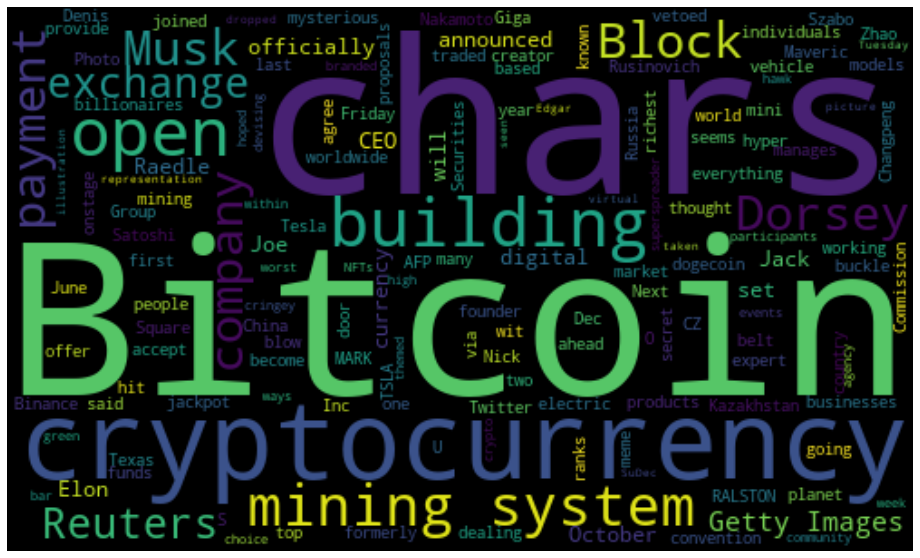

In [69]:
# Generate the Bitcoin word cloud
all_words = ' '.join( [word for word in bitcoin_df['text']] )
word_cloud = WordCloud(width = 500, height=300, random_state = 2, max_font_size = 119).generate(all_words)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

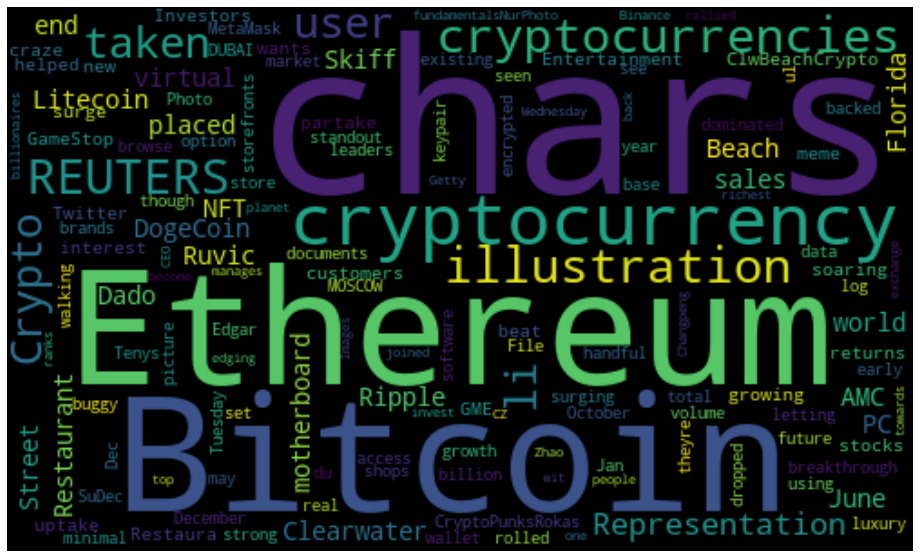

In [71]:
# Generate the Ethereum word cloud
all_words = ' '.join( [word for word in ethereum_df['text']] )
word_cloud = WordCloud(width = 500, height=300, random_state = 2, max_font_size = 119).generate(all_words)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [80]:
import spacy
from spacy import displacy

In [42]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 383 kB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [87]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [88]:
# Concatenate all of the Bitcoin text together
bitcoin_ner = ' '.join( [word for word in bitcoin_df['text']] )

In [89]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_ner)


# Add a title to the document
entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]

In [90]:
# Render the visualization
ner = displacy.render(doc, style='ent')

In [91]:
# List all Entities
entities = [i.lower().replace(' ', '_') for i in entities]
entities

['afp',
 'getty_images',
 'maveric_group',
 'kazakhstan',
 'china',
 'russia',
 'tesla_inc',
 'reuters',
 'the_u.s._securities_and_exchange_commission',
 'reuters',
 'reuters']

---

### Ethereum NER

In [92]:
# Concatenate all of the Ethereum text together
ethereum_ner = ' '.join( [word for word in ethereum_df['text']] )

In [93]:
# Run the NER processor on all of the text
doc = nlp(ethereum_ner)


# Add a title to the document
entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]

In [94]:
# Render the visualization
ner = displacy.render(doc, style='ent')

In [95]:
# List all Entities
entities = [i.lower().replace(' ', '_') for i in entities]
entities

['crypto_street_restaurant',
 'florida.@clwbeachcrypto/twitter\r\n',
 'clearwater_beach',
 'florida',
 'ethereum',
 'amc_entertainment',
 'amc',
 'gamestop',
 'gme',
 'cryptopunksrokas_tenys',
 'nft',
 'nft',
 'reuters',
 'dado_ruvic/file_photo',
 'skiff',
 'skiff',
 'reuters',
 'dado_ruvic/illustration\r\n',
 'moscow',
 'reuters',
 'reuters',
 'getty_images\r\ncryptocurrencies']

---